# Avocado Project

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar
and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    
    • Date - The date of the observation
    
    • AveragePrice - the average price of a single avocado
    
    • type - conventional or organic
    
    • year - the year
    
    • Region - the city or region of the observation
    
    • Total Volume - Total number of avocados sold
    
    • 4046 - Total number of avocados with PLU 4046 sold
    
    • 4225 - Total number of avocados with PLU 4225 sold
    
    • 4770 - Total number of avocados with PLU 4770 sold

## Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regression
    
Do both tasks in the same .ipynb file and submit at single file. 

In [1166]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [1167]:
# Importing Dataset

avocado = pd.read_csv('avocado.csv',skipinitialspace = True)
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

# Data Pre Processing

In [1168]:
# Checking the dimension of the dataset

avocado.shape

(18249, 14)

In [1169]:
# Dropping column 'Unnamed'

avocado.drop(['Unnamed: 0'],axis=1,inplace=True)
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [1170]:
# Renaming the features '4046','4225' and '4770'

avocado = avocado.rename(columns={'4046':'PLU 4046','4225':'PLU 4225','4770':'PLU 4770'})
avocado.head(5)

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [1171]:
# Checking the features present in the dataset

avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU 4046', 'PLU 4225',
       'PLU 4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [1172]:
# Checking the datatypes present in the dataset

avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU 4046        float64
PLU 4225        float64
PLU 4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [1173]:
# Checking the information of the dataset

avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU 4046      18249 non-null  float64
 4   PLU 4225      18249 non-null  float64
 5   PLU 4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [1174]:
# Checking the unique value present across the features

avocado.nunique()

Date              169
AveragePrice      259
Total Volume    18237
PLU 4046        17702
PLU 4225        18103
PLU 4770        12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [1175]:
# Checking for null values in the dataset

avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU 4046        0
PLU 4225        0
PLU 4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [1176]:
# Checking the values count present in column 'AveragePrice'

avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [1177]:
#Checking the total count of unique price present in 'Averageprice' column

avocado['AveragePrice'].nunique()

259

In [1178]:
# Checking the values count present in column 'region' 

avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [1179]:
#Checking the total count of unique region present in 'region' column

avocado['region'].nunique()

54

In [1180]:
# Splitting 'Month' from Date column

avocado['month'] = pd.DatetimeIndex(avacoda['Date']).month

In [1181]:
# Checking the dataset after splitting the 'Date' column

avocado.head(5)

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [1182]:
# Dropping 'Date' column, as we have separated the date into two different columns month and day

avocado.drop(['Date'],axis=1,inplace=True)
avocado.sample(5)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
876,1.20,191040.19,32241.22,83702.91,506.96,74589.10,73386.08,1203.02,0.00,conventional,2015,HarrisburgScranton,2
5184,0.71,6657073.54,3651444.14,1058769.74,617895.60,1328964.06,1124257.15,195845.36,8861.55,conventional,2016,SouthCentral,4
2905,0.97,481484.29,313342.08,57925.31,1008.13,109208.77,74366.38,34842.39,0.00,conventional,2016,Atlanta,2
8555,1.10,6379219.83,2086478.70,2413234.64,114573.33,1764933.16,1640897.04,47009.82,77026.30,conventional,2018,California,2
7126,1.72,1304560.72,56685.05,733184.24,3145.41,511546.02,270378.60,223986.86,17180.56,conventional,2017,NewYork,7


In [1183]:
# Checking the dimension of the dataset

avocado.shape

(18249, 13)

In [1184]:
# Splitting the dataset into Categorical and Numerical for Visualization

avocado_cat=[]
for i in avocado.columns:
    if avocado.dtypes[i]=='object':
        avocado_cat.append(i)
        
avocado_num=[]
for i in avocado.columns:
    if avocado.dtypes[i]!='object':
        avocado_num.append(i)
print('Categorical Column',avocado_cat)
print('Numerical Column',avocado_num)

Categorical Column ['type', 'region']
Numerical Column ['AveragePrice', 'Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month']


### Observations

Imported required libraries and imported avocado dataset

Used skipinitialspace = True while importing the dataset to clear any whitespaces present in the dataset

Dataset contains 18249 rows and 14 columns

Dropped Column 'Unnamed: 0', as it is not a relevant column for model prediction, moreover the Serial Number are for region
which is not unique and it is duplicate.

Renamed the features '4046','4225' and '4770' by adding 'PLU' to its prefix (Product Lookup codes (PLU’s) ) 

Datatypes present in the dataset are float64(9), int64(2) and object(3), 'Date' column was in object format

Unique value present in 'Averageprice' is 259 which we will be considering as target variable for Regression

Unique value present in 'region' is 54 which we will be considering as target variable for classification

Separated 'month' into different feature from 'Date' column

Dropping 'Date' and 'day', since 'year and 'month' will be relevant in improving the performance of Machine Learning
model. 

After dropping 'Unamed: 0'and 'Date' features, dimension of the dataset changes to 18249 rows and 13 columns

Splitted Categorical and Numerical columns for data visualization analysis

We will encode the categorical columns present in the dataset, when we proceed to Model Evaluation

# Data Visualization Analysis

<AxesSubplot:>

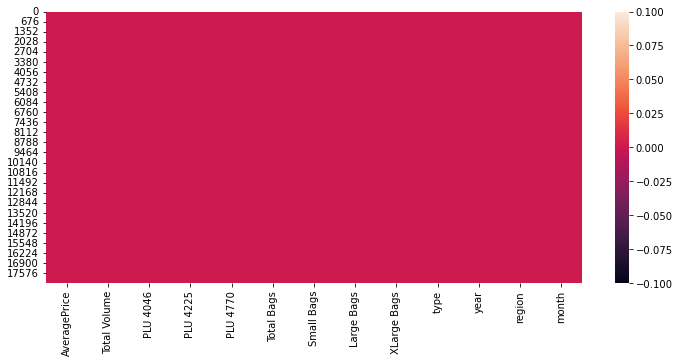

In [1185]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(avocado.isnull())

Visualizing the dataset with heatmap to see if there are any null values present in the dataset

No null values present in the dataset

# Univariate Analysis

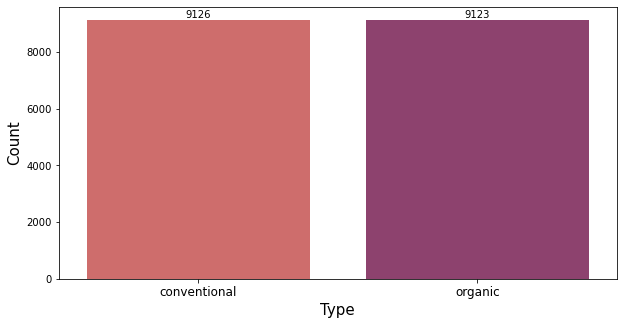

In [1186]:
# Visualizing column 'type' with countplot

plt.figure(figsize=(10,5))
ax = sns.countplot(avocado['type'],palette="flare")
plt.xlabel('Type',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=15)

for i in ax.containers:
    ax.bar_label(i,fontsize=10)


## Observations:

Visualizing the feature 'type' with countplot, we can see the count of conventional - 9126 and organic - 9123
both are almost equal

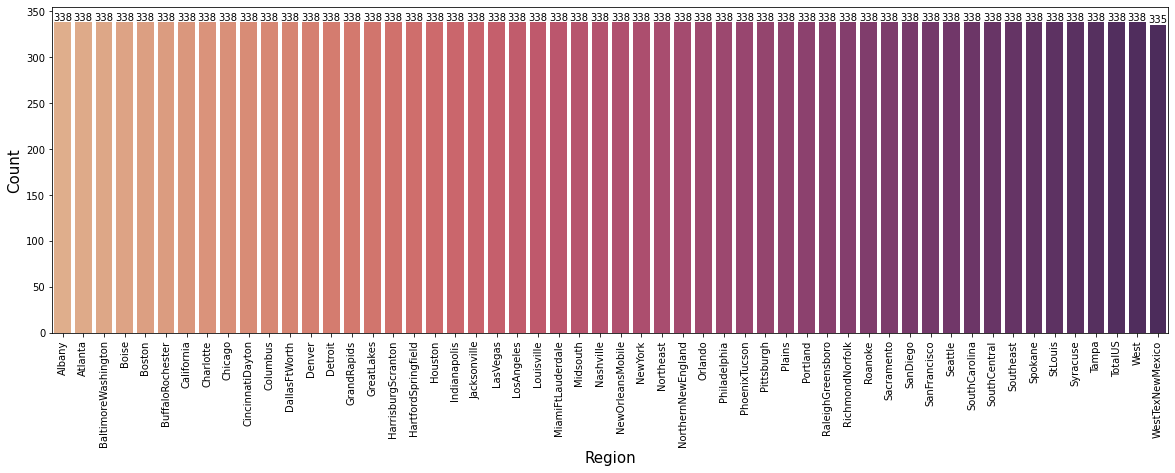

In [1016]:
# Visualizing 'region' with countplot

plt.figure(figsize=(20,6))
bx = sns.countplot(avocado['region'],palette="flare")
plt.xlabel('Region',fontsize=15)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize=15)
for i in bx.containers:
    bx.bar_label(i,fontsize=10)

### Observations:

By visualizing the 'region' with countplot we can observe,
Total of 54 region present in the dataset, in which 53 regions count is 338 except WestTexNewMexico count is 335 

Features are balanced for classification model

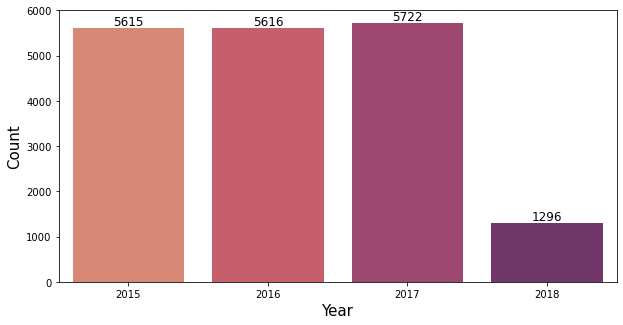

In [1187]:
# Visualizing 'year' with countplot

plt.figure(figsize=(10,5))
cx=sns.countplot(avocado['year'],palette="flare")
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
for i in cx.containers:
    cx.bar_label(i,fontsize=12)

## Observations:

By visualizing the feature 'year' with countplot, we can observe maximum entries made in the year
2017 with 5722, followed by the year 2016 with 5616, year 2015 with 5615 and least entries in year 2018 with 1296


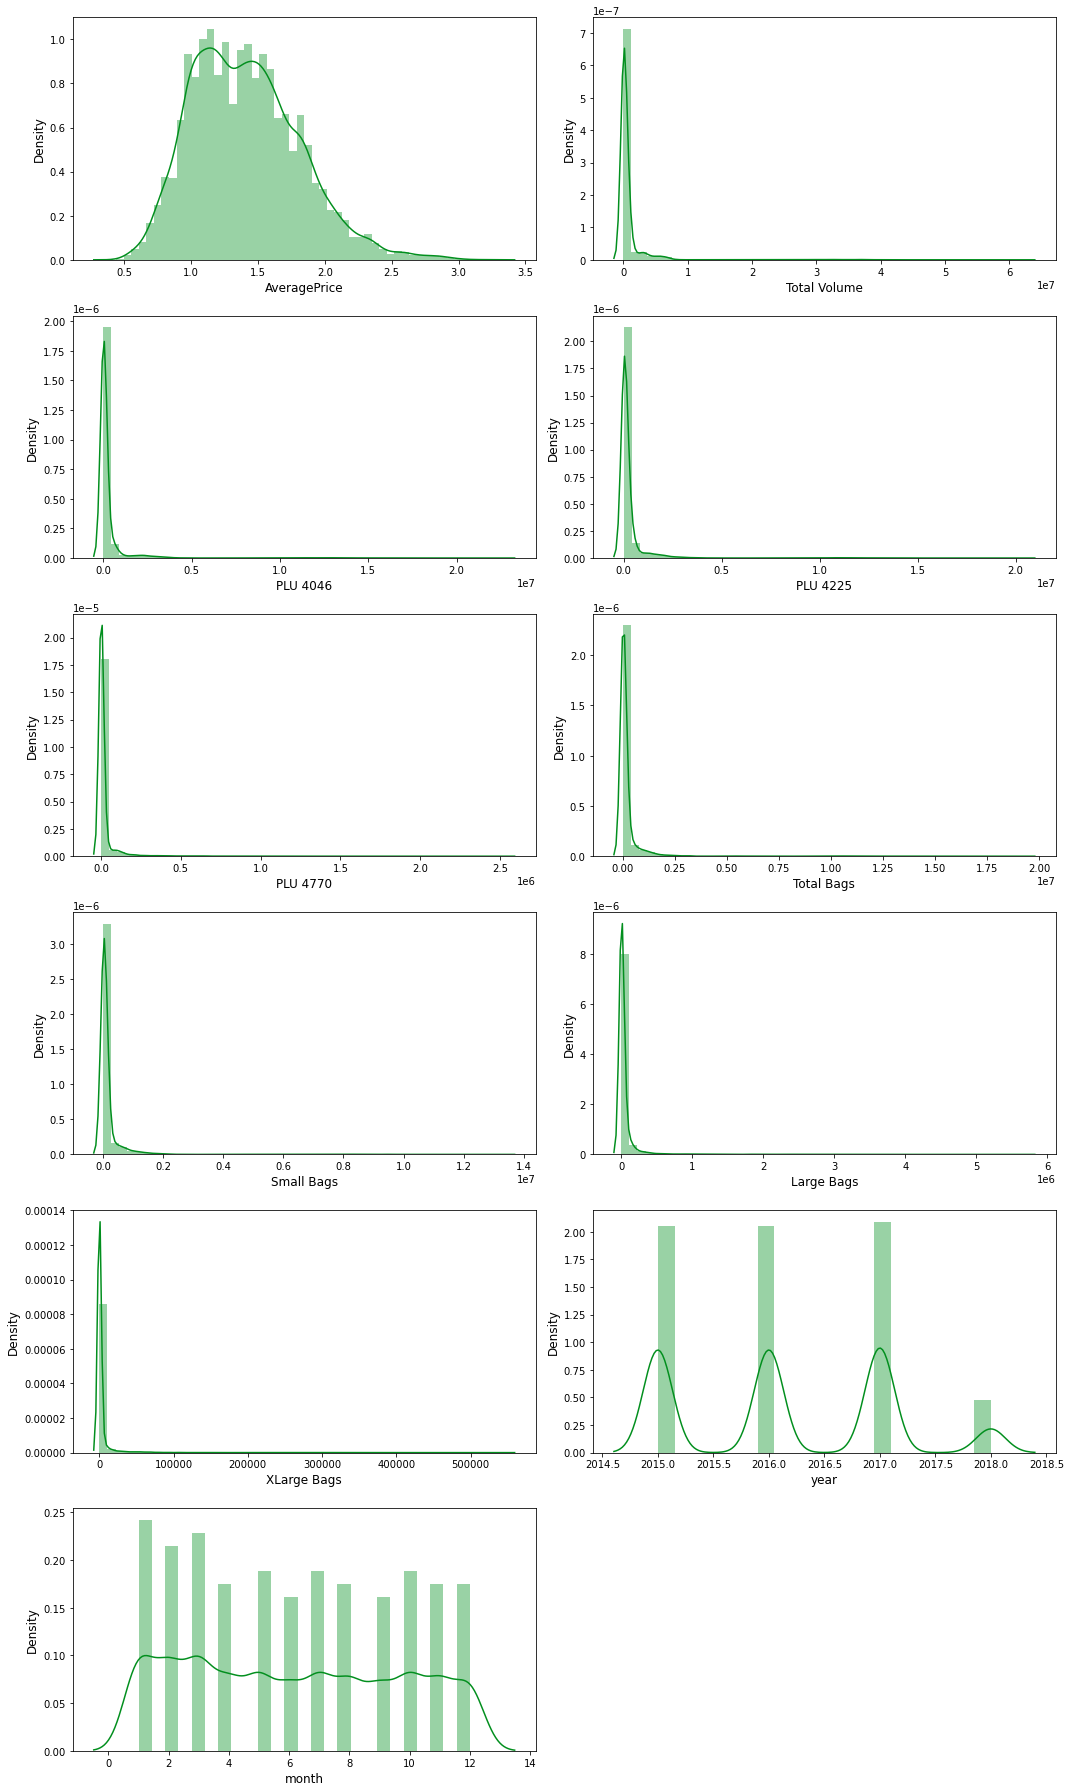

In [1188]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(15,25))
plot_number=1
for i in avocado_num:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.distplot(avocado[i],color="#028f1e")
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        plot_number+=1
plt.tight_layout()

## Observations:

Based on distribution plot we can observe most of the features 'Total Volume','PLU 4046','PLU 4225',
'PLU 4770','Total Bags','Small Bags','Large Bags','XLarge Bags' are skewed towards right

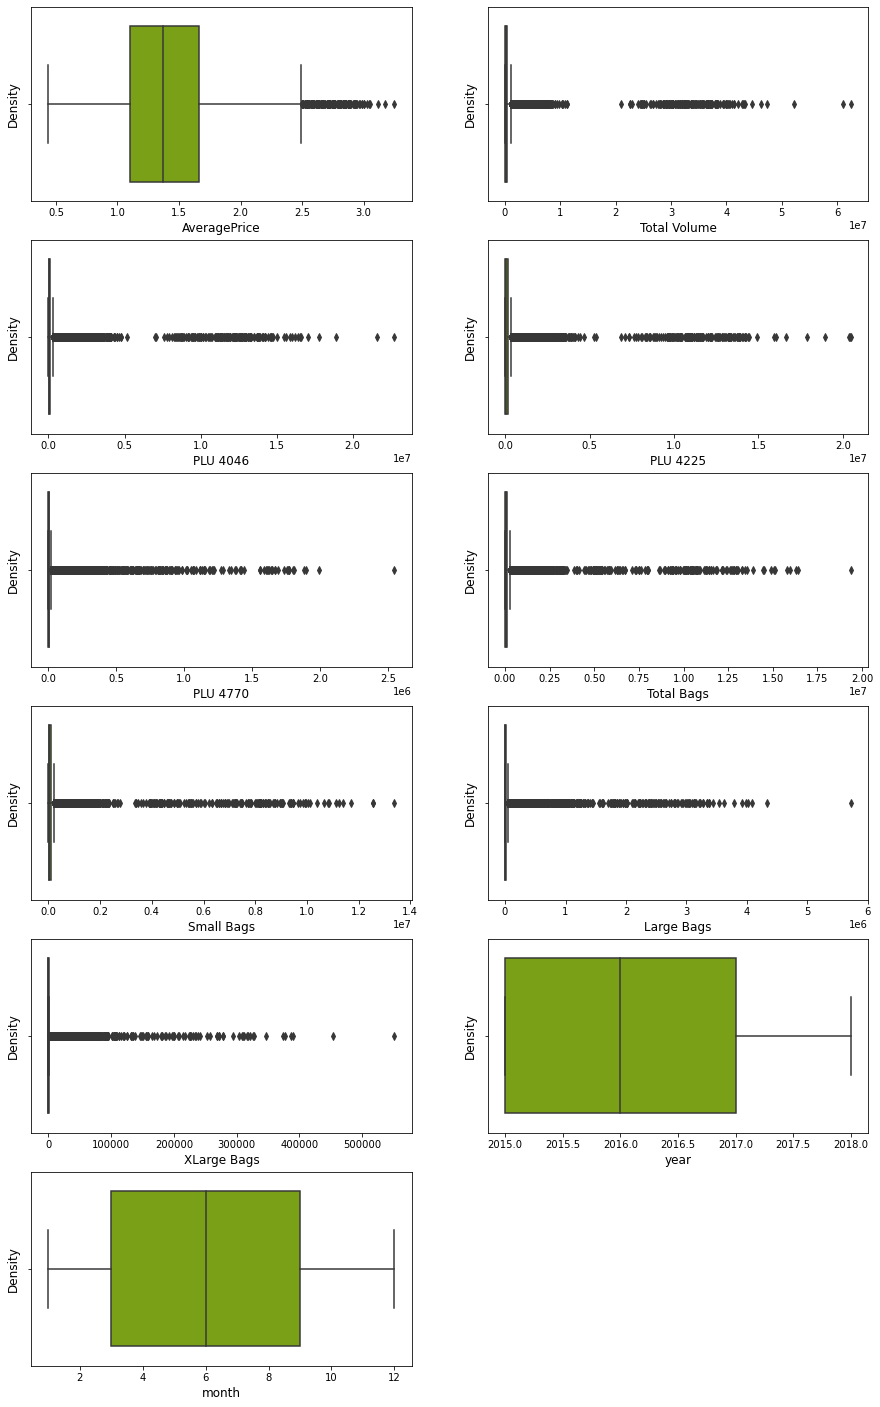

In [1189]:
# Checking outliers with boxplot

plt.figure(figsize=(15,25))
plot_number=1
for i in avocado_num:
    if plot_number <=12:
        ax=plt.subplot(6,2,plot_number)
        sns.boxplot( avocado[i],color='#84b701')
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
    plot_number+=1
plt.show()

Observations:
    
Outliers are identified using boxplot and we can see that in features 'AveragePrice','Total Volume','PLU 4046','PLU 4225', 'PLU 4770','Total Bags','Small Bags','Large Bags','XLarge Bags

# Bivariate Analysis

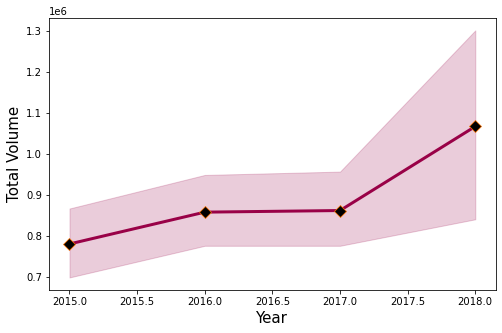

In [1190]:
# Comparing Year wise Total volume sold by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data =avocado,x='year',y='Total Volume',color="#990147",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Volume',fontsize=15)
plt.show()

## Observations:
    
Total volume sold is increasing year by year and maximum volume is sold in the year 2018

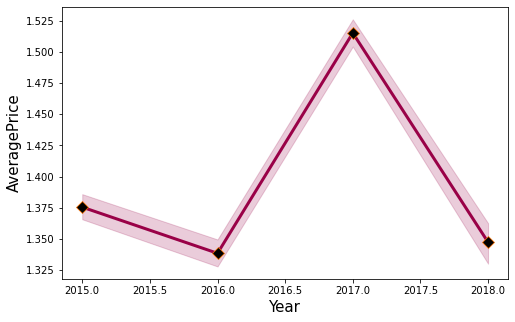

In [1191]:
# Comparing Year wise AveragePrice by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data =avocado,x='year',y='AveragePrice',color="#990147",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Year',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.show()

## Observations

Average price of the avocados was high during 2017 followed by 2015

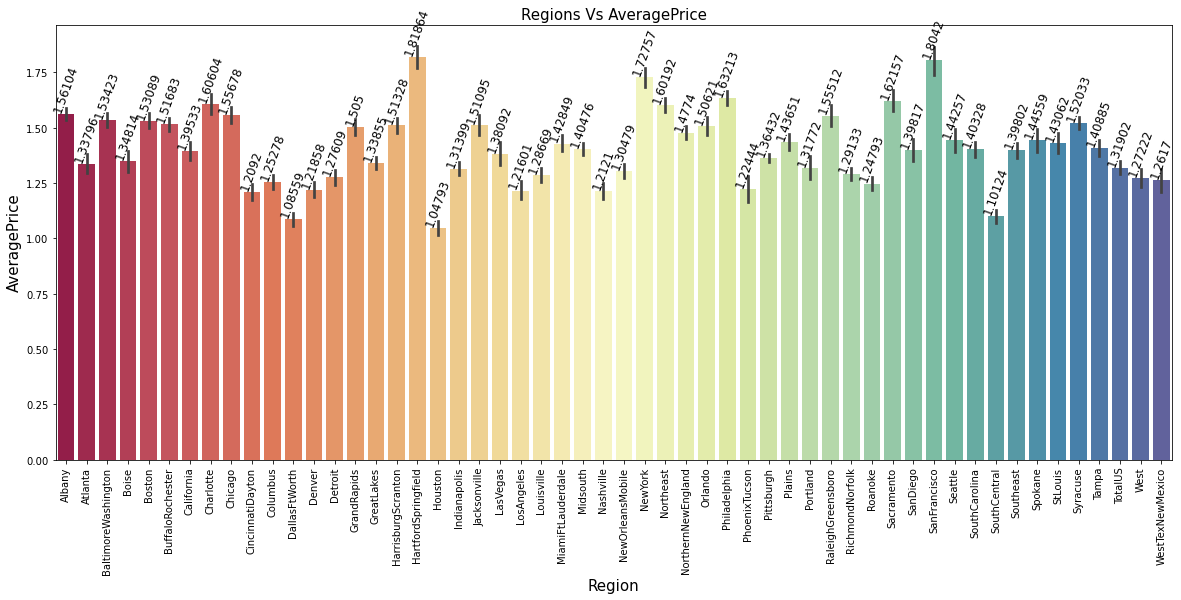

In [1192]:
# Comparing Regionwise AveragePrice by barplot

plt.figure(figsize=(20,8))
ex=sns.barplot(data =avocado,x='region',y='AveragePrice',palette="Spectral")
plt.xlabel('Region',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.xticks(rotation = 90)
plt.title('Regions Vs AveragePrice',fontsize=15)
for i in ex.containers:
    ex.bar_label(i,fontsize=12,rotation = 70)
plt.show()

## Observations

Average price of an avocado is highest in the regions HartfordSpringfield followed by SanFrancisco and NewYork

Average price of an avocado is lowest in the regions Houston followed by DallasFtWorth and SouthCentral                 

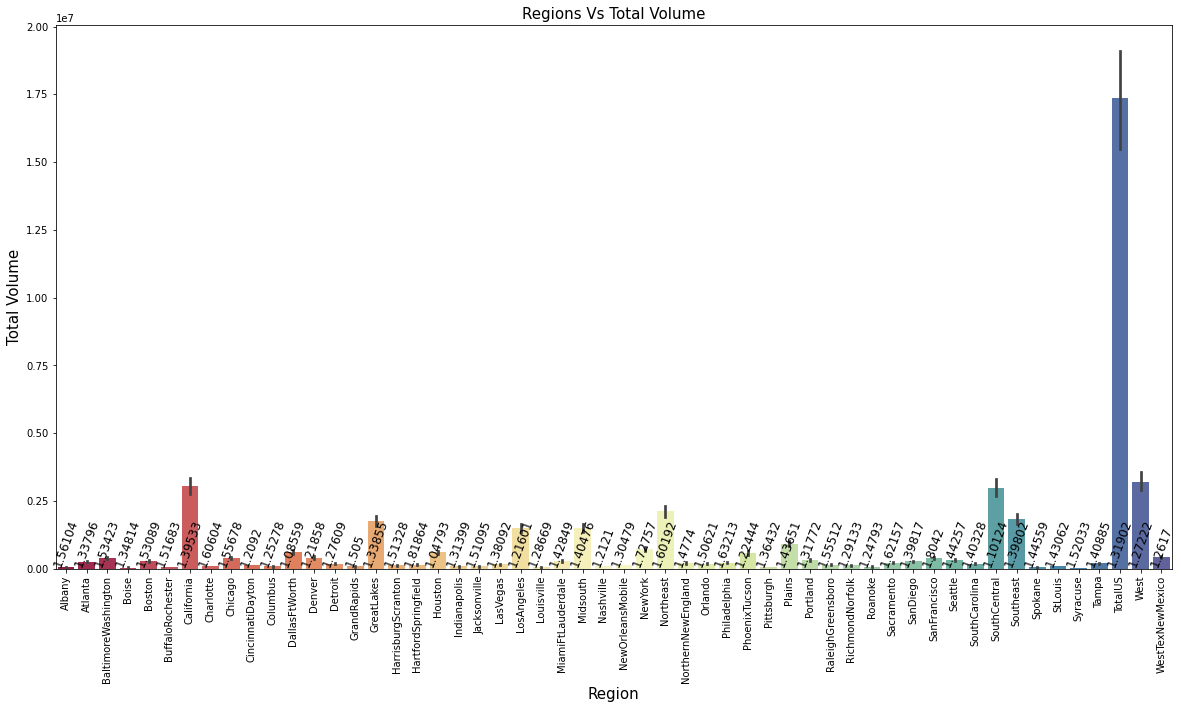

In [1193]:
# Comparing Regionwise Total Volume by lineplot

plt.figure(figsize=(20,10))
fx=sns.barplot(data =avocado,x='region',y='Total Volume',palette="Spectral")
plt.xlabel('Region',fontsize=15)
plt.ylabel('Total Volume',fontsize=15)
plt.title('Regions Vs Total Volume',fontsize=15)
plt.xticks(rotation = 90)
for i in ex.containers:
    fx.bar_label(i,fontsize=12,rotation = 70)
plt.show()

## Observations:
    
Regions which has the highest sales is TotalUS followed by West, SouthCentral, SouthEast,California,Northeast,Great lakes,
Los Angeles and Midsouth

Moreover when we compare Region Vs AveragePrice and Region Vs Total Volume, we can observe that Avocado sales are higher
in the regions where the Average Price is less than 1.6

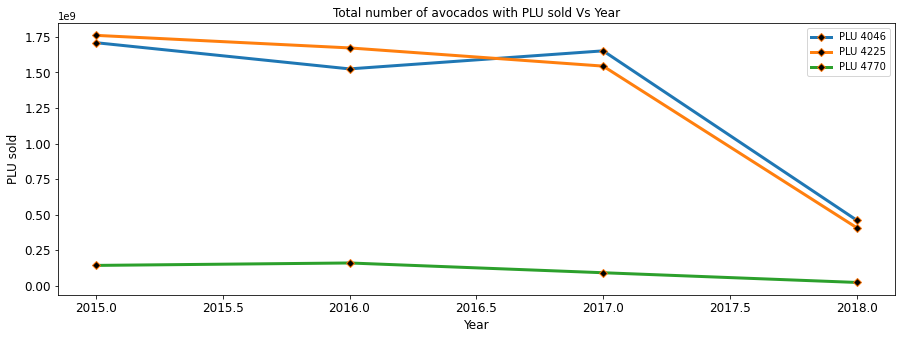

In [1194]:
# Comparing Month wise Total number of avocados with PLU sold

plu = avocado[['PLU 4046', 'PLU 4225', 'PLU 4770']].groupby(avocado.year).sum()
plu.plot(kind='line', fontsize=12,figsize=(15,5),
        linestyle = 'solid',linewidth=3,marker="D",markersize=6,markerfacecolor="k",markeredgecolor="#f97306")
plt.title("Total number of avocados with PLU sold Vs Year",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.ylabel("PLU sold",fontsize=12)
plt.show()

## Observations

Hass avocados sales are higher from 2015 to 2017 and drops down towards 2018

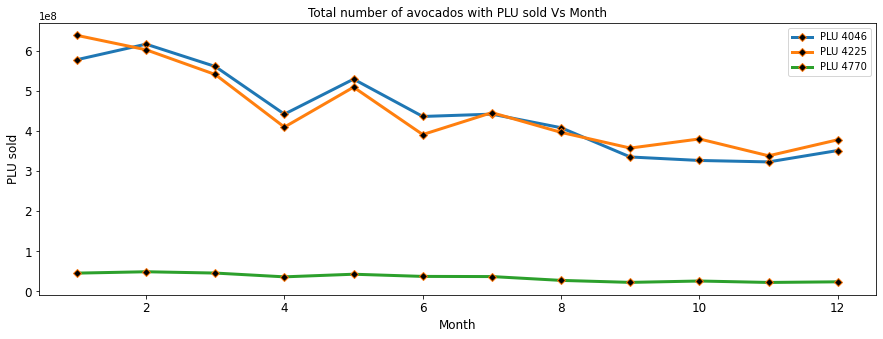

In [1195]:
# Comparing Month wise Total number of avocados with PLU sold

plu = avocado[['PLU 4046', 'PLU 4225', 'PLU 4770']].groupby(avocado.month).sum()
plu.plot(kind='line', fontsize=12,figsize=(15,5),
        linestyle = 'solid',linewidth=3,marker="D",markersize=6,markerfacecolor="k",markeredgecolor="#f97306")
plt.title("Total number of avocados with PLU sold Vs Month",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.ylabel("PLU sold",fontsize=12)
plt.show()

## Observations:
    
Total number of Hass avocados with PLU 4046, PLU 4225 and PLU 4770 Sales are higher during the first and second quarter 
of the year

Compared with other two varieties PLU 4770 sales is less

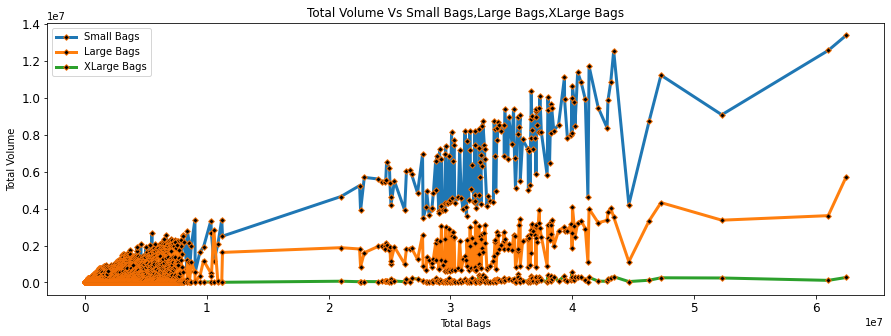

In [1196]:
# Comparing 'Small Bags', 'Large Bags', 'XLarge Bags' with 'Total Bags'

bags = avocado[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(avocado['Total Volume']).sum()
bags.plot(kind='line', fontsize=12,figsize=(15,5),
         linestyle = 'solid',linewidth=3,marker="D",markersize=4,markerfacecolor="k",markeredgecolor="#f97306")
plt.title("Total Volume Vs Small Bags,Large Bags,XLarge Bags")
plt.xlabel("Total Bags")
plt.ylabel("Total Volume")
plt.show()

## Observations

Small Bags sales are higher followed by large and Xlarge bags


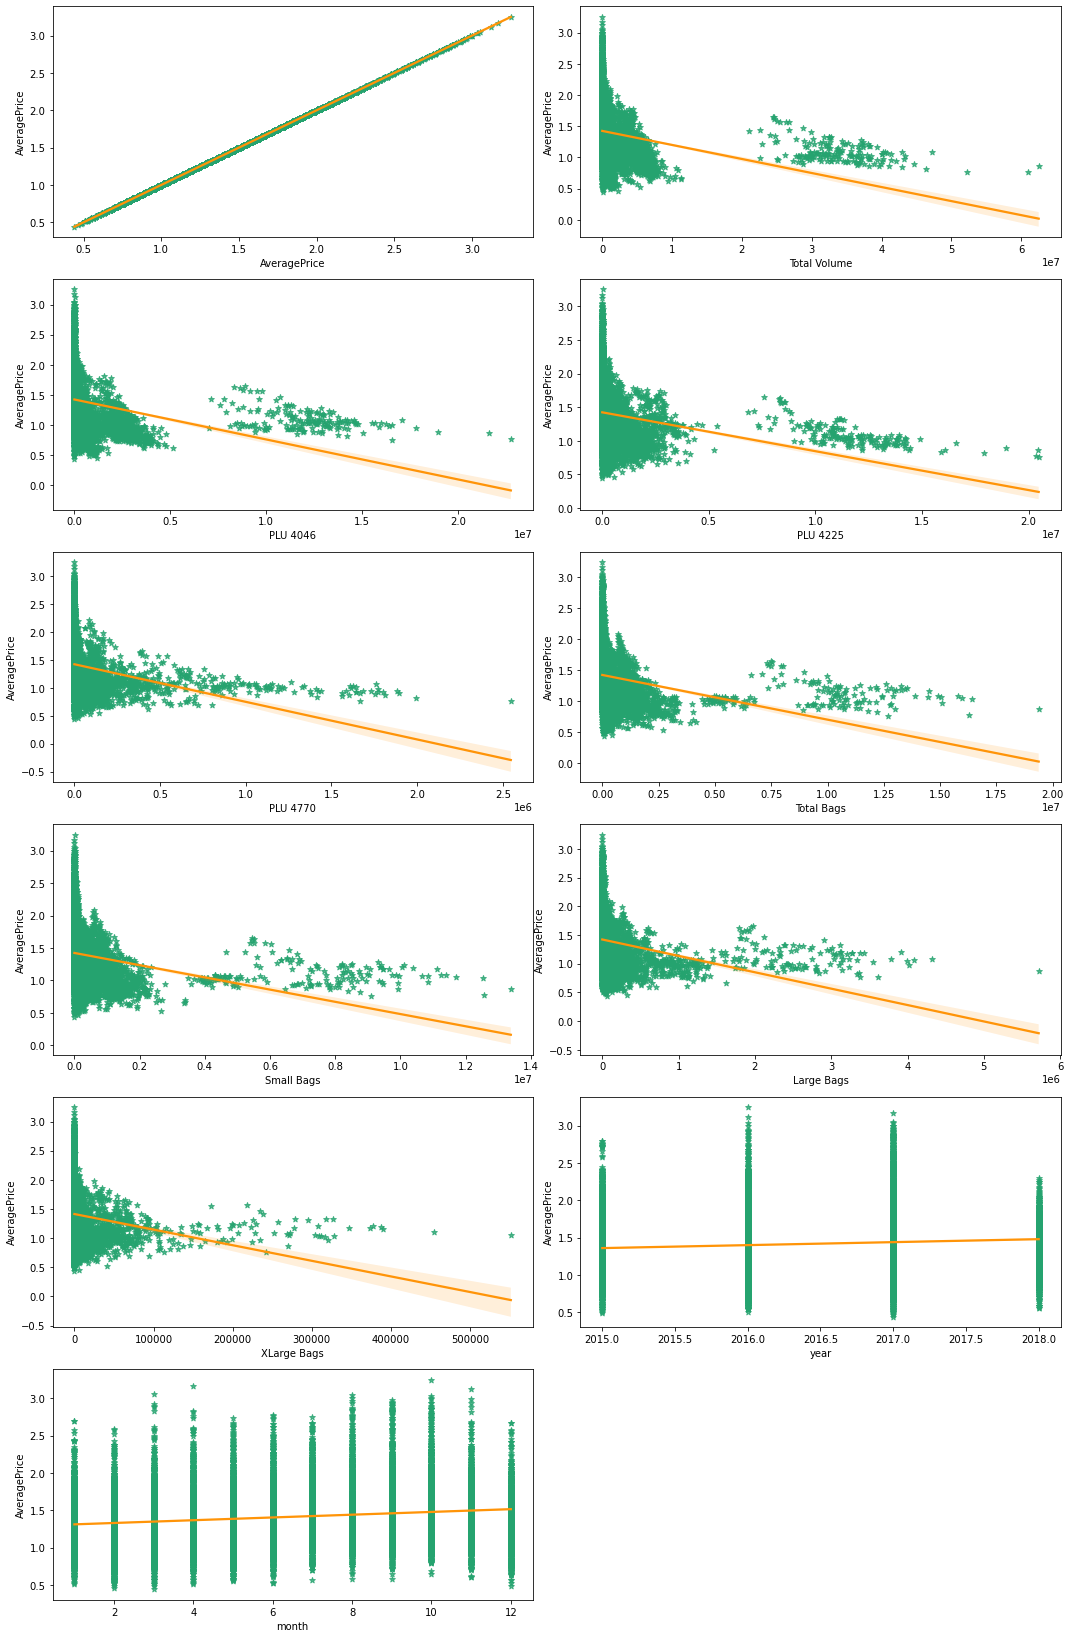

In [1197]:
# Visualizing the dataset with regplot with target variable

plt.figure(figsize=(15,30))
plot_number=1
for i in avocado_num:
    if plot_number <=17:
        ax=plt.subplot(8,2,plot_number)
        sns.regplot(x=avocado[i],y=avocado['AveragePrice'],scatter_kws={"color": "#25a36f"}, 
                    line_kws={"color": "#ff9408"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

## Observations:
    
Used regplot for evaluating the associations of the feature variable with target variable('AveragePrice')

We can observe 'Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770','Total Bags', 'Small Bags', 
'Large Bags', 'XLarge Bags' are decreasing when the AveragePrice increases

'Year' and 'Month' we can see increasing trend
       

# Data Feature Selection and Engineering

### Label Encoding

In [1198]:
# Label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in avocado.columns:
    if (avocado[i].dtypes=='object'):
        avocado[i]=le.fit_transform(avocado[i].values.reshape(-1,1))

In [1199]:
avocado.sample(10)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
9187,1.87,5476.77,2441.49,2684.67,0.00,350.61,180.00,170.61,0.00,1,2015,1,10
5737,1.58,664501.74,55766.21,443692.78,4745.57,160297.18,158757.44,1466.41,73.33,0,2017,2,9
299,1.39,119890.65,1352.63,48430.03,80.52,70027.47,69919.00,108.47,0.00,0,2015,5,3
11372,1.88,23132.95,4351.20,11840.73,19.98,6921.04,1027.09,5893.95,0.00,1,2015,43,10
16366,1.62,14208.82,97.08,229.93,0.00,13881.81,13881.81,0.00,0.00,1,2017,30,4
965,0.72,1172177.72,675888.37,364707.14,3899.67,127682.54,72504.80,55177.74,0.00,0,2015,18,6
16818,1.53,10892.04,262.63,1702.26,0.00,8927.15,8539.60,387.55,0.00,1,2017,39,10
9928,1.50,87348.95,3971.27,63468.50,0.00,19909.18,4387.73,15521.45,0.00,1,2015,15,7
12137,1.77,1117.32,12.64,497.95,0.00,606.73,183.34,423.39,0.00,1,2016,3,1
3997,0.65,3664088.60,931605.09,837742.21,90043.21,1804698.09,1567442.40,222150.04,15105.65,0,2016,22,2


## Observations

Encoded categorical columns 'type' and 'region' using label encoder for further analysis

### Describe - Statistic Summary

In [1200]:
# Checking the datset with describe function

avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
PLU 4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
PLU 4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
PLU 4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


## Observations:

Count is same across all the columns stating no missing values

Mean is greater than median(50%) in columns 'Total Volume','PLU 4225','PLU 4770',and 'Large Bags' which shows data is skewed towards right side

Also we can see the difference between 75% to max are high in few columns which indicates outliers are present 

### Correlation Analysis

<AxesSubplot:>

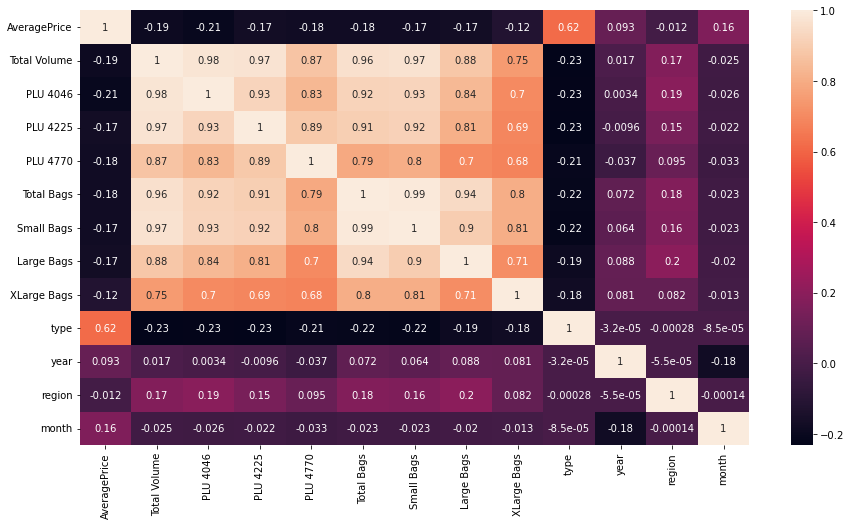

In [1201]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(avocado.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

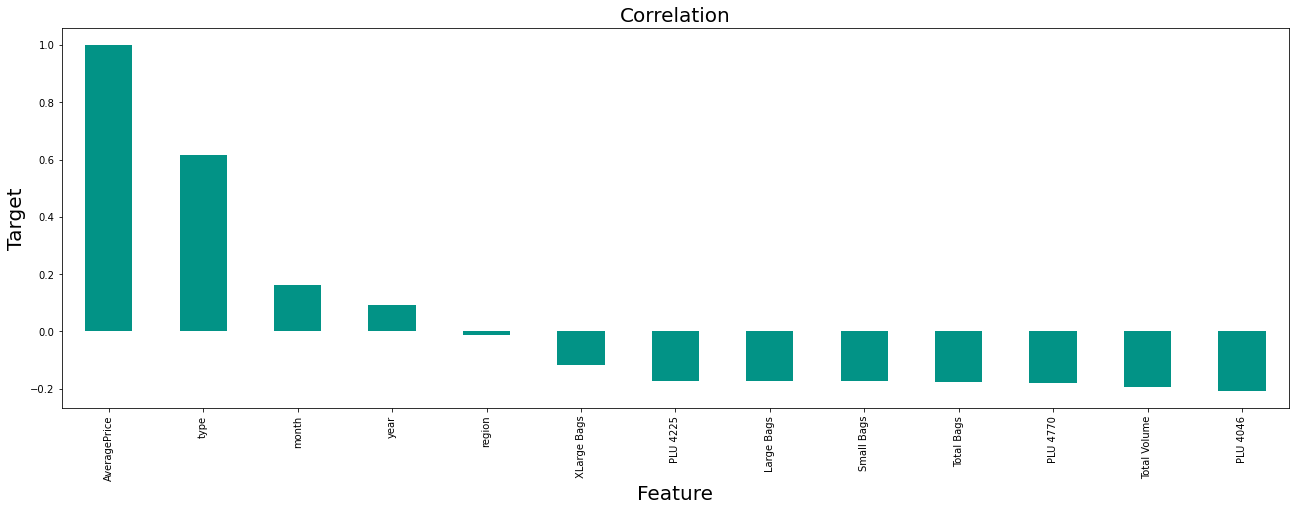

In [1202]:
# Checking Correlation of the input attributes with the Target variable by Bar Plot

plt.figure(figsize=(22,7))
avocado.corr()['AveragePrice'].sort_values(ascending=False).plot(kind='bar',color='#029386')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [1203]:
avocado.corr()['AveragePrice'].sort_values()

PLU 4046       -0.208317
Total Volume   -0.192752
PLU 4770       -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
PLU 4225       -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

### Observations for AveragePrice(Regression)

'Total Volume','PLU 4046','PLU 4770','Total Bags','PLU 4225','Small Bags', 'Large Bags', 'XLarge Bags'
are negatively correlated with the target variable 'AveragePrice'

'year','month' are positively correlated with the target variable 'AveragePrice'

In [1205]:
avocado.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
month          -0.000144
year           -0.000055
XLarge Bags     0.082281
PLU 4770        0.095252
PLU 4225        0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
PLU 4046        0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

### Observations for Region (Classification)

'AveragePrice','month','type','year','day' are negatively correlated with the target variable region   

'Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are positively 
correlated with target variable region

### Outliers Treatment with Zscore

In [1242]:
# Removing outliers using Z score

from scipy.stats import zscore

col=['Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
z1 = avocado[col]
z1.head()

,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [1243]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [1244]:
avocado_new = avocado[(z<3).all(axis=1)]

In [1245]:
avocado.shape

(18249, 13)

In [1246]:
avocado_new.shape

(17782, 13)

In [1247]:
# Checking the dataloss

dataloss = (18249-17782)/18249*100
dataloss

2.55904433119623

### Observations:
    
After applying z score to remove outliers, data loss is at 2.55% which is in acceptable range.


## Skewness

In [1248]:
# Checking Skewness 

avocado_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU 4046        4.928850
PLU 4225        4.472729
PLU 4770        5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
dtype: float64

In [1249]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
avocado_new[skew] = pt.fit_transform(avocado_new[skew].values)

In [1250]:
avocado_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU 4046       -0.038259
PLU 4225       -0.043246
PLU 4770        0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
dtype: float64

### Observations

After applying power transform method - yeo johnson skewness has been reduced in all the columns

Except XLarge Bags were skewness is at 0.86, even after trying with log,sqrt,cbrt methods skewness was not reduced in 
XLarge Bags.

Keeping the threshold for skewness at +/- 0.86

PowerTransformer(method='yeo-johnson',standardize=False) kept the standardize to false, as there will be scaling method
applied to the same features in case if the VIF is high due to multicollinearity 

## Variance Inflation Factor

In [1251]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = avocado_new.drop("AveragePrice",axis=1)  # Splitting the dataset by removing AveragePrice for Regression
x.sample(5)

,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
12763,12.302862,13.046827,18.675830,-0.000000,14.263114,15.262595,14.328517,-0.0,1,2016,15,1
16025,8.567284,5.219944,7.957132,-0.000000,10.830304,12.559622,1.564888,-0.0,1,2017,24,10
5627,11.833466,10.186221,18.346129,4.026940,12.163703,12.989962,11.578011,-0.0,0,2017,0,10
10592,9.913154,8.983595,13.744526,5.972007,9.911673,6.762559,10.549578,-0.0,1,2015,28,10
11579,7.508211,6.265031,9.025577,-0.000000,7.332927,0.000000,7.796636,-0.0,1,2015,47,10


In [1252]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

     VIF Factor      Features
0   1292.179279  Total Volume
1     44.193388      PLU 4046
2     86.195245      PLU 4225
3      9.472374      PLU 4770
4    446.389965    Total Bags
5    138.033794    Small Bags
6     12.482313    Large Bags
7      2.875228   XLarge Bags
8      7.620465          type
9    269.949229          year
10     4.219742        region
11     4.087104         month


### Observations

VIF is high in columns 'Total Volume','PLU 4046','PLU 4225','Total Bags','Small Bags','Large Bags','year'

We will apply scaling method to standardize the features

In [1253]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Total Volume','PLU 4046','PLU 4225','Total Bags','Small Bags','Large Bags','year']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
5709,0.829419,1.109554,0.328928,4.726372,0.925770,0.825456,1.170722,2.522979,0,0.914459,1,3
14404,-1.456928,-0.948709,-0.756283,-0.000000,-2.946333,-2.325249,-1.622090,-0.000000,1,-0.150224,47,6
12381,-0.377203,-1.504344,0.122312,-0.000000,-1.145141,-0.883369,-1.622090,-0.000000,1,-0.150224,8,5
13380,-1.479246,-0.811457,-2.353121,-0.000000,-1.099748,-0.843823,-1.622090,-0.000000,1,-0.150224,27,2
2912,0.930883,0.574064,1.188697,8.478519,0.846580,0.969318,0.100844,2.455164,0,-0.150224,2,12


In [1254]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor      Features
0    50.083570  Total Volume
1     6.981962      PLU 4046
2    10.799187      PLU 4225
3     5.759803      PLU 4770
4    34.165068    Total Bags
5    16.576572    Small Bags
6     3.451175    Large Bags
7     2.775337   XLarge Bags
8     4.668150          type
9     1.364999          year
10    3.735910        region
11    3.556336         month


In [1255]:
# Dropping colum 'Total Volume'

x2 = x.drop(['Total Volume'],axis=1)
x2.sample(3)

,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
7717,0.607603,0.367417,4.666720,0.691195,0.814657,0.136131,1.756742,0,0.914459,39,5
249,-0.125001,1.135777,4.564447,0.656614,0.791499,-0.309000,-0.000000,0,-1.214908,4,3
15289,-0.827142,-0.985506,-0.000000,-0.739917,-0.629819,-0.108448,-0.000000,1,0.914459,10,8


### Observations

After applying scaling method to standardize the data, still we can observe VIF is high in columns
'Total Volume','PLU 4225','Total Bags','Small Bags'

Dropping column 'Total Volume' which got maximum VIF

In [1256]:
# Checking VIF after dropping column 'Total Volume'

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor     Features
0     3.739291     PLU 4046
1     4.275442     PLU 4225
2     5.710567     PLU 4770
3    24.479999   Total Bags
4    16.571943   Small Bags
5     3.397678   Large Bags
6     2.772714  XLarge Bags
7     4.559788         type
8     1.364628         year
9     3.735279       region
10    3.549807        month


In [1257]:
# Dropping column 'Total Bags'

x3=x2.drop(['Total Bags'],axis=1)

In [1258]:
# Checking VIF after dropping column 'Total Bags'

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor     Features
0    3.720612     PLU 4046
1    4.131176     PLU 4225
2    5.710550     PLU 4770
3    4.051625   Small Bags
4    1.845832   Large Bags
5    2.772293  XLarge Bags
6    4.555175         type
7    1.339456         year
8    3.735156       region
9    3.546271        month


### Observation

Dropped column 'Total Bags', now we can see VIF is under 10 which resolves multicollinearity

# Model Evaluation For Regression

In [744]:
# Splitting X and Y variables for further analysis

In [1262]:
x3.shape

(17782, 10)

In [1263]:
x3.head()

,PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.649918,0.358278,3.786332,-0.337064,-0.775214,-0.0,0,-1.214908,0,12
1,-0.770067,0.276355,3.963722,-0.301038,-0.765237,-0.0,0,-1.214908,0,12
2,-0.724508,0.656010,4.709184,-0.364044,-0.752534,-0.0,0,-1.214908,0,12
3,-0.625017,0.475615,4.166196,-0.500341,-0.693012,-0.0,0,-1.214908,0,12
4,-0.677083,0.268966,4.206164,-0.479918,-0.600755,-0.0,0,-1.214908,0,11


In [1264]:
y= avocado_new['AveragePrice']
y.shape

(17782,)

In [1265]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Finding Random State

In [1266]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x3_train,x3_test,y_train,y_test = train_test_split(x3,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x3_train,y_train)
    predlr = lr.predict(x3_test)
    acc = r2_score(y_test,predlr)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  52.70729204891707 on Random state 140


Best Random state is 140 with .30(30%) as test size

## Train and Test Split

In [1267]:
# Training the Model with .30 as test size and random state at 140

x3_train,x3_test,y_train,y_test = train_test_split(x3,y,test_size=.30, random_state=140)

## Model Selection

In [1268]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

## Lasso

In [1269]:
ls = Lasso()

ls.fit(x3_train,y_train)
ls.score(x3_train,y_train)
print(ls.score(x3_train,y_train)*100)
ls_predict=ls.predict(x3_test)
cr1 = cross_val_score(ls,x3,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

0.0
MSE: 0.16373576321766453
MAE: 0.3286525139129741
r2_score: 0.0
CV score of Lasso Regression: -120.04309324076277


## Ridge

In [1270]:
rd = Ridge()  
rd.fit(x3_train,y_train)
rd.score(x3_train,y_train)
print(rd.score(x3_train,y_train))
rd_predict=rd.predict(x3_test)
cr2 = cross_val_score(rd,x3,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

0.5009084261373675
MSE: 0.07743627961354226
MAE: 0.21642683353648567
r2_score: 3.7985269941319677
CV score of Ridge Regression: 8.958927809738908


## Linear Regression

In [1271]:
LR=LinearRegression()
LR.fit(x3_train,y_train)
print(LR.score(x3_train,y_train))
LR_predict=LR.predict(x3_test)
cr3 = cross_val_score(LR,x3,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

0.5009085360622585
MSE: 0.07743505782894469
MAE: 0.2164282805553521
r2_score: 3.843332385085063
CV score of Linear Regression: 8.959563657473817


## Random Forest Regressor

In [1272]:
RFR = RandomForestRegressor()
RFR.fit(x3_train,y_train)
print(RFR.score(x3_train,y_train))
RFR_predict=RFR.predict(x3_test)
cr4 = cross_val_score(RFR,x3,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

0.9833968185358872
MSE: 0.01919133172633552
MAE: 0.09548809746954075
r2_score: 85.59900996509465
CV score of Random Forest Regressor: 22.275531096508683


## Decision Tree Regressor

In [1273]:
DT = DecisionTreeRegressor()
DT.fit(x3_train,y_train)
print(DT.score(x3_train,y_train))
DT_predict=DT.predict(x3_test)
cr5 = cross_val_score(DT,x3,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of Decision Tree Regressor:',cr5.mean()*100)

1.0
MSE: 0.040808641049671975
MAE: 0.12990627928772258
r2_score: 75.37454940927039
CV score of Decision Tree Regressor: -32.37463163205419


## Gradient Boosting Regressor

In [1274]:
GB = GradientBoostingRegressor()
GB.fit(x3_train,y_train)
print(GB.score(x3_train,y_train))
GB_predict = GB.predict(x3_test)
cr6 = cross_val_score(GB,x3,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr6.mean()*100)

0.752187625223878
MSE: 0.041542296318815335
MAE: 0.15485122214388364
r2_score: 58.96925629395384
CV score of Gradient Boosting Regressor: 38.73614587147494


## K Neighbors Regressor

In [1275]:
KNN = KNeighborsRegressor()
KNN.fit(x3_train,y_train)
print(KNN.score(x3_train,y_train))
KNN_predict = KNN.predict(x3_test)
cr7 = cross_val_score(KNN,x3,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

0.9032134366082855
MSE: 0.025246222305529514
MAE: 0.11056082474226805
r2_score: 82.08264804142338
CV score of K Neighbors Regressor: -31.585969172239047


## Bagging Regressor

In [1276]:
BR = BaggingRegressor()
BR.fit(x3_train,y_train)
print(BR.score(x3_train,y_train))
BR_predict = BR.predict(x3_test)
cr8 = cross_val_score(BR,x3,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr8.mean()*100)

0.9746463746263498
MSE: 0.022669773758200562
MAE: 0.10396532333645735
r2_score: 83.2493320395799
CV score of Bagging Regressor: 20.414353401394475


## SGDRegressor

In [1277]:
SR = SGDRegressor()
SR.fit(x3_train,y_train)
print(SR.score(x3_train,y_train))
SR_predict = SR.predict(x3_test)
cr9 = cross_val_score(SR,x3,y,cv=5)

print('MSE:',mean_squared_error(SR_predict,y_test))
print('MAE:',mean_absolute_error(SR_predict,y_test))
print('r2_score:',r2_score(SR_predict,y_test)*100)
print('CV score of SGD Regressor:',cr9.mean()*100)

0.4590294519078866
MSE: 0.08390310407636577
MAE: 0.22898166446777204
r2_score: -16.687542152688238
CV score of SGD Regressor: -6.626823224654288


##  AdaBoostRegressor

In [1278]:
ABR = AdaBoostRegressor()
ABR.fit(x3_train,y_train)
print(ABR.score(x3_train,y_train))
ABR_predict = ABR.predict(x3_test)
cr10 = cross_val_score(ABR,x3,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

0.5579540123064912
MSE: 0.0721235583887114
MAE: 0.21777809348240804
r2_score: 25.879832439183538
CV score of Ada Boost Regressor: 1.0489074783816021


## ExtraTreesRegressor

In [1279]:
ET = ExtraTreesRegressor()
ET.fit(x3_train,y_train)
print(ET.score(x3_train,y_train))
ET_predict = ET.predict(x3_test)
cr11 = cross_val_score(ET,x3,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr11.mean()*100)

1.0
MSE: 0.014806634485473287
MAE: 0.08328554826616681
RMSE: 0.12168251511812733
r2_score: 89.23994641180987
CV score of Extra Trees Regressor: 27.57159865371463


### Observation

ExtraTreesRegressor is performing well with r2_score of 89%, MSE: 0.01,MAE: 0.08, RMSE: 0.12 and
Cross validation score of 27.5% when compared with other models

Proceeding to Hyper Parameter Tuning for ExtraTreesRegressor

## Hyper Parameter Tuning

In [1282]:
grid_params={'n_estimators':[100,150],'criterion':['squared_error','friedman_mse'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5]}
             
        
gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x3_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 150],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150]})
Best Score 0.8984270922961561
Best Params {'criterion': 'friedman_mse', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 150}


# Final Model Regression

In [1283]:
Final_Model = ExtraTreesRegressor(n_estimators =150, criterion = 'friedman_mse',max_depth=100,min_samples_split=2)
                                       
Final_Model.fit(x3_train,y_train)
pred = Final_Model.predict(x3_test)
scores = r2_score(y_test,pred)
cr11 = cross_val_score(Final_Model,x3,y,cv=5)

print('MSE:',mean_squared_error(pred,y_test))
print('MAE:',mean_absolute_error(pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred, ET_predict)))
print('r2_score:',r2_score(pred,y_test)*100)
print('CV score of Extra Trees Regressor:',cr11.mean()*100)

MSE: 0.014704854464646469
MAE: 0.08282119337706967
RMSE: 0.020738606687814624
r2_score: 89.30652052515502
CV score of Extra Trees Regressor: 28.28970262686431


### Observation
    
Final Model ExtraTreesRegressor is yielding a good result of r2_score: 89.3%, MSE: 0.014,MAE: 0.08,RMSE: 0.02 and Cross Validation score
of 28.2 with parameter tuning

Concluding ExtraTreesRegressor as the best fit Final Model. let's save the model for prediction

# Saving the model

In [1284]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Avocado_price_pred.pkl")

['Avocado_price_pred.pkl']

# Predicting the Model

In [1285]:
# Loading the saved model

Model=joblib.load('Avocado_price_pred.pkl')

#Prediction
prediction = Model.predict(x3_test)

prediction

array([0.75446667, 0.9438    , 1.01706667, ..., 1.72913333, 1.02993333,
       2.25433333])

In [1287]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x3_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.754467,0.76
1,0.943800,0.98
2,1.017067,0.96
3,1.719733,1.85
4,1.344533,1.37
5,1.511933,1.35
6,0.834000,0.75
7,1.133933,1.17
8,1.512400,1.50
9,0.979267,1.02


# Conclusion For Regression Model

ExtraTreesRegressor Model which was built on the Avocado dataset to predict the 'AveragePrice' of an avocado is performing good as we can see, Original Vs Predicted value is same, which shows the developed Model is performing well with the given dataset.


# Model Evaluation for Classification

### Data Feature Selection and Engineering

In [1322]:
# Checking skewness

avocado_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU 4046       -0.038259
PLU 4225       -0.043246
PLU 4770        0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
dtype: float64

### Observations

Already applied power transform method - yeo johnson to reduce skewness and it has been reduced in all the columns

Except XLarge Bags were skewness is at 0.86, even after trying with log,sqrt,cbrt methods skewness was not reduced in XLarge Bags.

Keeping the threshold for skewness at +/- 0.86

In [1323]:
# Splitting the dataset by removing region for classification

x4 = avocado_new.drop("region",axis=1)  
x4.sample(5)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
2113,1.14,13.837500,16.835626,21.676621,8.862886,15.882281,19.457630,0.000000,-0.000000,0,2015,5
17295,2.02,9.174874,4.234800,9.811721,-0.000000,11.708349,11.453863,11.858836,-0.000000,1,2017,10
5373,1.38,11.804897,11.069477,17.502470,2.781007,14.276098,17.048534,0.000000,2.443325,0,2016,8
396,1.21,12.899925,14.452181,17.560784,9.822485,16.496635,20.220689,11.033832,-0.000000,0,2015,5
2809,1.53,11.760979,10.168770,18.029674,4.765621,12.795411,14.999293,8.571180,1.989023,0,2016,12


In [1324]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x4.values,i) for i in range(len(x4.columns))]
vif['Features'] = x4.columns
print(vif)

     VIF Factor      Features
0     27.410398  AveragePrice
1   1318.522996  Total Volume
2     42.048384      PLU 4046
3     92.559644      PLU 4225
4      9.470241      PLU 4770
5    452.255786    Total Bags
6    143.482137    Small Bags
7     12.498478    Large Bags
8      2.880181   XLarge Bags
9      8.594136          type
10   324.315387          year
11     4.277478         month


VIF is high in features 'Total Volume','AveragePrice','PLU 4046','PLU 4225','Total Bags','Small Bags','Large Bags','year'

In [1325]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Total Volume','AveragePrice','PLU 4046','PLU 4225','Total Bags','Small Bags','Large Bags','year']
st = StandardScaler()
x4[m] = st.fit_transform(x4[m].values)
x4.sample(5)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
15112,0.731987,-0.830665,-1.521833,-0.526808,5.097111,-0.653717,-0.453001,-0.778720,-0.0,1,0.914459,12
6845,0.707128,-0.080023,-0.291221,0.046519,3.439021,0.094845,-0.152325,0.776552,-0.0,0,0.914459,10
10450,0.234804,-0.010349,-0.088274,0.173573,7.829179,-0.011905,-0.190004,0.660755,-0.0,1,-1.214908,7
13943,-0.113224,-0.966398,-1.035529,-0.556925,5.399678,-0.909527,-0.740961,-0.329770,-0.0,1,-0.150224,5
13169,0.234804,-1.656430,-2.289976,-0.911223,-0.000000,-1.849097,-1.637740,-0.695993,-0.0,1,-0.150224,3


In [1326]:
# Checking VIF after applying standard scaler

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x4.values,i) for i in range(len(x4.columns))]
vif['Features'] = x4.columns
print(vif)

    VIF Factor      Features
0     2.045701  AveragePrice
1    52.290186  Total Volume
2     6.789205      PLU 4046
3    12.161365      PLU 4225
4     5.380942      PLU 4770
5    34.806372    Total Bags
6    17.226428    Small Bags
7     3.458576    Large Bags
8     2.787850   XLarge Bags
9     3.980884          type
10    1.462715          year
11    3.526162         month


Even after applying scaling method to standardize, VIF is high in features 
'Total Volume','Total Bags','Small Bags','PLU 4225'

In [1330]:
# Dropping 'Total Volume','Total Bags' from the dataset due to high VIF

x5=x4.drop(['Total Volume','Total Bags'],axis=1)

In [1331]:
# Checking VIF after dropping 'Total Volume','Total Bags'

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x5.values,i) for i in range(len(x5.columns))]
vif['Features'] = x5.columns
print(vif)

   VIF Factor      Features
0    1.808603  AveragePrice
1    3.564666      PLU 4046
2    4.352801      PLU 4225
3    5.348694      PLU 4770
4    4.069639    Small Bags
5    1.991368    Large Bags
6    2.779410   XLarge Bags
7    3.911742          type
8    1.402746          year
9    3.490548         month


In [1338]:
# Splitting X and Y variables for ModelTesting

x5.shape

(17782, 10)

In [1333]:
y2 = avocado_new['region']
y2.shape

(17782,)

In [1336]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Finding Random State

In [1341]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x5_train,x5_test,y2_train,y2_test = train_test_split(x5,y2,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x5_train,y2_train)
    predlr = lr.predict(x5_test)
    acc = accuracy_score(y2_test,predlr)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 44.329896907216494 on Random State 104


Best  random state is at 104 with test size .30 (30%)

## Train and Split

In [1343]:
# Training the Model with .30 as test size and random state at 104

x5_train,x5_test,y2_train,y2_test = train_test_split(x5,y2,test_size=.30, random_state=104)

In [1420]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## GaussianNB

In [1417]:
GB = GaussianNB()
GB.fit(x5_train,y2_train)
print(GB.score(x5_train,y2_train))
GB_predict = GB.predict(x5_test)
cr12 = cross_val_score(GB,x5,y2,cv=5)

    
print(accuracy_score(y2_test,GB_predict)*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))
print('CV score of GaussianNB:',cr12.mean()*100)

0.08105878824235153
8.457040035987404
[[26  0  1 ...  0  0  0]
 [ 5  1  0 ...  0  5  1]
 [ 4  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 18  0]
 [18  0  0 ...  0 15  2]]
              precision    recall  f1-score   support

           0       0.06      0.34      0.10        77
           1       0.06      0.01      0.02        85
           2       0.01      0.01      0.01        94
           3       0.11      0.21      0.14        75
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        74
           6       1.00      0.03      0.05        72
           7       0.17      0.11      0.13        85
           8       0.00      0.00      0.00        78
           9       0.20      0.25      0.22        96
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00        86
          12       0.03      0.05      0.04        95
          13       0.05      0.03      0.04      

## SVC

In [1421]:
SV = SVC()
SV.fit(x5_train,y2_train)
print(SV.score(x5_train,y2_train))
SV_predict = SV.predict(x5_test)
cr13 = cross_val_score(SV,x5,y2,cv=5)
    
print(accuracy_score(y2_test,SV_predict)*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))
print('CV score of SVC:',cr13.mean()*100)

0.5469406118776244
51.32703553756185
[[63  0  1 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 56 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  3  0 ...  0  0 16]]
              precision    recall  f1-score   support

           0       0.38      0.82      0.52        77
           1       0.21      0.34      0.26        85
           2       0.57      0.60      0.58        94
           3       0.67      0.53      0.59        75
           4       0.81      0.32      0.46        91
           5       0.34      0.35      0.35        74
           6       0.73      0.90      0.81        72
           7       0.54      0.55      0.55        85
           8       0.87      0.94      0.90        78
           9       0.53      0.42      0.47        96
          10       0.41      0.36      0.38        83
          11       0.54      0.52      0.53        86
          12       0.68      0.75      0.71        95
          13       0.73      0.38      0.50       

## LogisticRegression

In [1445]:
LR = LogisticRegression()
LR.fit(x5_train,y2_train)
print(LR.score(x5_train,y2_train))
LR_predict = LR.predict(x5_test)
cr14 = cross_val_score(LR,x5,y2,cv=5)
    
print(accuracy_score(y2_test,LR_predict)*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))
print('CV score of LogisticRegression:',cr14.mean()*100)

0.4290641871625675
44.01709401709402
[[35  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  1]
 [ 0  0 43 ...  0  0  2]
 ...
 [ 0  0  0 ... 39  3  0]
 [ 0  0  0 ...  2 51  0]
 [ 0  4  1 ...  0  0 12]]
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        77
           1       0.19      0.35      0.25        85
           2       0.51      0.46      0.48        94
           3       0.44      0.47      0.45        75
           4       0.43      0.47      0.45        91
           5       0.26      0.19      0.22        74
           6       0.65      0.82      0.72        72
           7       0.52      0.73      0.60        85
           8       0.47      0.73      0.57        78
           9       0.54      0.70      0.61        96
          10       0.45      0.36      0.40        83
          11       0.65      0.51      0.57        86
          12       0.40      0.47      0.43        95
          13       0.18      0.09      0.12       

## RandomForestClassifier

In [1423]:
RFC = RandomForestClassifier()
RFC.fit(x5_train,y2_train)
print(RFC.score(x5_train,y2_train))
RFC_predict = RFC.predict(x5_test)
cr15 = cross_val_score(RFC,x5,y2,cv=5)
    
print(accuracy_score(y2_test,RFC_predict)*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))
print('CV score of RandomForestClassifier:',cr15.mean()*100)

1.0
92.1727395411606
[[74  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  1]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  1  1 ...  0  0 70]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        77
           1       0.90      0.85      0.87        85
           2       0.97      1.00      0.98        94
           3       0.90      0.97      0.94        75
           4       0.98      0.99      0.98        91
           5       0.88      0.88      0.88        74
           6       0.96      0.99      0.97        72
           7       0.92      0.95      0.94        85
           8       1.00      0.97      0.99        78
           9       0.90      0.92      0.91        96
          10       0.86      0.87      0.86        83
          11       0.95      0.91      0.93        86
          12       1.00      1.00      1.00        95
          13       0.89      0.86      0.88        94
          14

## DecisionTreeClassifier

In [1425]:
DTC = DecisionTreeClassifier()
DTC.fit(x5_train,y2_train)
print(DTC.score(x5_train,y2_train))
DTC_predict = DTC.predict(x5_test)
cr16 = cross_val_score(DTC,x5,y2,cv=5)
    
print(accuracy_score(y2_test,DTC_predict)*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))
print('CV score of DecisionTreeClassifier:',cr16.mean()*100)

1.0
79.84705353126405
[[65  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  3]
 [ 0  0 85 ...  0  0  2]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  2  2 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.65      0.69      0.67        85
           2       0.89      0.90      0.89        94
           3       0.77      0.81      0.79        75
           4       0.87      0.86      0.86        91
           5       0.61      0.82      0.70        74
           6       0.92      0.96      0.94        72
           7       0.86      0.87      0.87        85
           8       0.95      0.95      0.95        78
           9       0.83      0.85      0.84        96
          10       0.71      0.77      0.74        83
          11       0.85      0.74      0.80        86
          12       0.87      0.85      0.86        95
          13       0.82      0.68      0.74        94
          1

## KNeighborsClassifier

In [1426]:
KNC = KNeighborsClassifier()
KNC.fit(x5_train,y2_train)
print(KNC.score(x5_train,y2_train))
KNC_predict = KNC.predict(x5_test)
cr17 = cross_val_score(KNC,x5,y2,cv=5)

    
print(accuracy_score(y2_test,KNC_predict)*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))
print('CV score of KNeighborsClassifier:',cr17.mean()*100)

0.8105878824235153
63.69770580296896
[[62  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  2  1 ...  0  0 43]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        77
           1       0.44      0.58      0.50        85
           2       0.74      0.82      0.78        94
           3       0.68      0.80      0.74        75
           4       0.59      0.66      0.62        91
           5       0.44      0.62      0.51        74
           6       0.65      0.74      0.69        72
           7       0.60      0.72      0.65        85
           8       0.88      0.94      0.91        78
           9       0.42      0.56      0.48        96
          10       0.43      0.55      0.49        83
          11       0.69      0.81      0.75        86
          12       0.92      0.83      0.87        95
          13       0.54      0.46      0.49       

## GradientBoostingClassifier

In [1428]:
GBC = GradientBoostingClassifier()
GBC.fit(x5_train,y2_train)
print(GBC.score(x5_train,y2_train))
GBC_predict = GBC.predict(x5_test)
cr18 = cross_val_score(GBC,x5,y2,cv=5)


print(accuracy_score(y2_test,GBC_predict)*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))
print('CV score of GradientBoostingClassifier:',cr18.mean()*100)

0.9803539292141572
83.10841205578048
[[69  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  2]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  2 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        77
           1       0.79      0.64      0.71        85
           2       0.96      0.95      0.95        94
           3       0.73      0.88      0.80        75
           4       0.85      0.85      0.85        91
           5       0.77      0.73      0.75        74
           6       0.96      0.97      0.97        72
           7       0.85      0.86      0.85        85
           8       0.97      0.90      0.93        78
           9       0.84      0.84      0.84        96
          10       0.75      0.78      0.76        83
          11       0.87      0.85      0.86        86
          12       0.96      0.91      0.93        95
          13       0.82      0.71      0.76       

## AdaBoostClassifier

In [1429]:
ABC = AdaBoostClassifier()
ABC.fit(x5_train,y2_train)
print(ABC.score(x5_train,y2_train))
ABC_predict = ABC.predict(x5_test)
cr19 = cross_val_score(ABC,x5,y2,cv=5)

print(accuracy_score(y2_test,ABC_predict)*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))
print('CV score of AdaBoostClassifier:',cr19.mean()*100)

0.06951109778044391
7.130004498425552
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  4  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.00      0.00      0.00        85
           2       0.00      0.00      0.00        94
           3       0.12      0.01      0.02        75
           4       0.11      0.23      0.15        91
           5       0.00      0.00      0.00        74
           6       0.00      0.00      0.00        72
           7       0.06      0.99      0.11        85
           8       0.00      0.00      0.00        78
           9       0.00      0.00      0.00        96
          10       0.00      0.00      0.00        83
          11       0.11      0.52      0.18        86
          12       0.00      0.00      0.00        95
          13       0.04      0.01      0.02      

## BaggingClassifier

In [1430]:
BC = BaggingClassifier()
BC.fit(x5_train,y2_train)
print(BC.score(x5_train,y2_train))
BC_predict = BC.predict(x5_test)
cr20 = cross_val_score(BC,x5,y2,cv=5)
    
print(accuracy_score(y2_test,BC_predict)*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))
print('CV score of BaggingClassifier:',cr20.mean()*100)

0.9952009598080384
86.8196131354026
[[71  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  2]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  0  1 ...  0  0 66]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        77
           1       0.80      0.79      0.79        85
           2       0.95      0.97      0.96        94
           3       0.87      0.92      0.90        75
           4       0.88      0.93      0.90        91
           5       0.79      0.89      0.84        74
           6       0.93      0.97      0.95        72
           7       0.84      0.91      0.87        85
           8       0.96      0.94      0.95        78
           9       0.87      0.94      0.90        96
          10       0.74      0.84      0.79        83
          11       0.92      0.88      0.90        86
          12       0.96      0.93      0.94        95
          13       0.88      0.83      0.85        

### Observations

Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 92% with Cross validation score of 69% which is good compared with other Models

Let's proceed with Hyper Parameter Tuning to enhance the Model

## Hyper Parameter Tuning

In [1436]:
grid_params={'n_estimators':[100,150],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x5_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150]})
Best Score 0.9127923383640013
Best Params {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 150}


Best Parameter for RandomForestClassifier by hyper parameter tuning

Best Params {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 150}

# Final Model Classification

In [1446]:
Final_Model2 = RandomForestClassifier(n_estimators =150, criterion = 'entropy',max_depth=100,min_samples_split=2)
                                       
Final_Model2.fit(x5_train,y2_train)
pred2 = Final_Model2.predict(x5_test)
print(Final_Model2.score(x5_train,y2_train))
cr22 = cross_val_score(Final_Model2,x5,y2,cv=5)

print(accuracy_score(y2_test,pred2)*100)
print(confusion_matrix(y2_test,pred2))
print(classification_report(y2_test,pred2))
print('CV score of RandomForestClassifier:',cr22.mean()*100)

1.0
92.33018443544759
[[74  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  2 ...  0  0 73]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        77
           1       0.89      0.87      0.88        85
           2       0.98      0.99      0.98        94
           3       0.91      0.97      0.94        75
           4       0.98      0.93      0.96        91
           5       0.89      0.89      0.89        74
           6       0.96      0.97      0.97        72
           7       0.96      0.96      0.96        85
           8       1.00      0.95      0.97        78
           9       0.89      0.94      0.91        96
          10       0.86      0.89      0.88        83
          11       0.97      0.91      0.94        86
          12       0.99      1.00      0.99        95
          13       0.93      0.86      0.90        94
          1

### AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

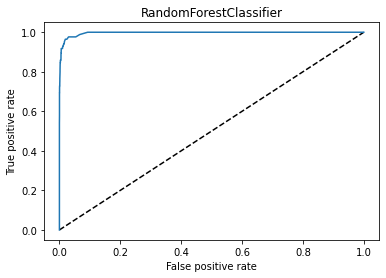

0.9990135780172261

In [1438]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob = RFC.predict_proba(x5_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,RFC.predict_proba(x5_test),multi_class='ovr')
auc_score

### Observation

Based on Accuracy Score 92%  Vs Cross Validation Score 69% Vs AUC_ROC_Curve 99%

Concluding Random Forest Classifier Model is the best fit model for classification to predict the 'region' for 
Avocado dataset

# Saving the Final model - RandomForestClassifier

In [1439]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model2,"Avocado_region_pred.pkl")

['Avocado_region_pred.pkl']

# Predicting the Model

In [1440]:
# Loading the saved model

Model2=joblib.load("Avocado_region_pred.pkl")

#Prediction
prediction2 = Model2.predict(x5_test)
prediction2

array([ 4, 46, 22, ..., 28, 36,  4])

In [1441]:
pd.DataFrame([Model2.predict(x5_test)[:],y2_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,4,4
1,46,46
2,22,22
3,43,43
4,37,37
5,25,25
6,17,17
7,2,2
8,46,46
9,2,53


# Conclusion For Classification Model

RandomForestClassifier Model which was built on the Avocado dataset to predict the 'region' of an avocado is performing
good as we can see, Original Vs Predicted value is same, which shows the developed Model is performing well with the 
given dataset.

# Final Conclusion

Avocado Dataset contains good amount of data with 18249 rows 14 columns

Both the Model which was built on the base of the Avocado case study dataset is predicting good as we can see, 
Original Vs Predicted value is same, in both Regression - Extra Trees Regressor Model and Classification - Random Forest Classifier Model

As we compare Region Vs AveragePrice and Region Vs Total Volume, we can observe that Avocado sales are higher in 
the regions where the Average Price is less than 1.6

Average price of the avocados was high during 2017 followed by 2015

Total volume sold is increasing year by year and maximum volume is sold in the year 2018, because when we compare the 
'Average Price' vs 'Year', 2018 average price was less when compared with previous years and that is one of the reason
for an increase in avocado sales

If we drill down further, regions with highest Average price are HartfordSpringfield followed by SanFrancisco and NewYork
and lowest are Houston followed by DallasFtWorth and SouthCentral
Regions which has the highest sales is TotalUS followed by West, SouthCentral, SouthEast,California,Northeast,Great lakes, Los Angeles and Midsouth
Here we can see avocados with less average price are sold maximum.

Small Bags sales are higher followed by large and Xlarge bags 

Total number of Hass avocados with PLU 4046, PLU 4225 and PLU 4770 Sales are higher during the first and second quarter of the year
Compared with other two varieties PLU 4770 sales is less.

For predicitng the 'region' the classes were already balanced region wise and yielded good result
with Accuracy Score 92% Vs Cross Validation Score 69% Vs AUC_ROC_Curve 99%

Finally in this dataset if we can include the store or retailer details where the avocado is purchased, it will add even more
advantage in predicting 'Average Price' and it will also help in identying the sales of different types of stores or retailers 'region' wise

Thank you for Providing the opportunity to work on the Avocado case study dataset.